# Preproccesing

In [0]:
!pip install tmtoolkit #installing in google colab

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
import random
random.seed(20191120)

import numpy as np
np.set_printoptions(precision=5)

from tmtoolkit.corpus import Corpus
url = "https://s3.amazonaws.com/vargo.aprd6342/data/rusdata_utf8.csv"

import codecs
import csv
import urllib

corpus = Corpus() #corpus: set of documents
TEXT_FIELD = 8

with urllib.request.urlopen(url) as response: #performing a web request to open url 
  stream = urllib.request.urlopen(url) #opening the url 
  csvfile= csv.reader(codecs.iterdecode(stream,'utf-8')) 
  for i, line in enumerate(csvfile):
    corpus.add_doc(str(i), line[TEXT_FIELD])

In [0]:
print(len(corpus))
corpus.doc_labels
corpus['91']

2604


'Expecting mother includes late husband in maternity photo shoot Through the struggles and pains of losing a dear husband. Nicole Bennett has built courage to take maternity photos with her 4-year-old son. She added old photos of late husband Deonta  but they were slightly faded to appear as a spirit \x92¢Î\x97Î\x94 a symbol of hope that he watches over them. She also did this as a memorial for her unborn daughter who is due March 25. We commend her for her boldness and we hope that she finds solace in these photos. #NicoleBernett #Maternityphotoswithlatehusband'

(array([1759.,  389.,  182.,  130.,   78.,   37.,   18.,    6.,    3.,
           2.]),
 array([   0. ,  239.3,  478.6,  717.9,  957.2, 1196.5, 1435.8, 1675.1,
        1914.4, 2153.7, 2393. ]),
 <a list of 10 Patch objects>)

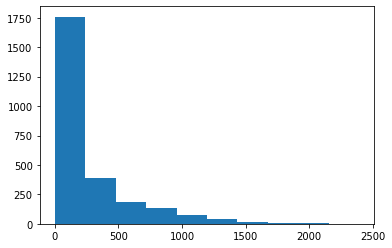

In [0]:
import matplotlib
matplotlib.pyplot.hist(corpus.doc_lengths.values())

In [0]:
from tmtoolkit.preprocess import TMPreproc
preproc = TMPreproc (corpus)
preproc.pos_tag()
preproc.lemmatize()
preproc.tokens_to_lowercase()
preproc.remove_special_chars_in_tokens()
preproc.add_stopwords(['http','nt'])

<TMPreproc [2604 documents]>

In [0]:
corpus['91']

'Expecting mother includes late husband in maternity photo shoot Through the struggles and pains of losing a dear husband. Nicole Bennett has built courage to take maternity photos with her 4-year-old son. She added old photos of late husband Deonta  but they were slightly faded to appear as a spirit \x92¢Î\x97Î\x94 a symbol of hope that he watches over them. She also did this as a memorial for her unborn daughter who is due March 25. We commend her for her boldness and we hope that she finds solace in these photos. #NicoleBernett #Maternityphotoswithlatehusband'

In [0]:
preproc.tokens['91']

['expecting',
 'mother',
 'include',
 'late',
 'husband',
 'in',
 'maternity',
 'photo',
 'shoot',
 'through',
 'the',
 'struggle',
 'and',
 'pain',
 'of',
 'lose',
 'a',
 'dear',
 'husband',
 '',
 'nicole',
 'bennett',
 'have',
 'build',
 'courage',
 'to',
 'take',
 'maternity',
 'photo',
 'with',
 'her',
 '4yearold',
 'son',
 '',
 'she',
 'add',
 'old',
 'photo',
 'of',
 'late',
 'husband',
 'deonta',
 'but',
 'they',
 'be',
 'slightly',
 'fade',
 'to',
 'appear',
 'as',
 'a',
 'spirit',
 '\x92¢î\x97î\x94',
 'a',
 'symbol',
 'of',
 'hope',
 'that',
 'he',
 'watch',
 'over',
 'them',
 '',
 'she',
 'also',
 'do',
 'this',
 'as',
 'a',
 'memorial',
 'for',
 'her',
 'unborn',
 'daughter',
 'who',
 'be',
 'due',
 'march',
 '25',
 '',
 'we',
 'commend',
 'her',
 'for',
 'her',
 'boldness',
 'and',
 'we',
 'hope',
 'that',
 'she',
 'find',
 'solace',
 'in',
 'these',
 'photo',
 '',
 '',
 'nicolebernett',
 '',
 'maternityphotoswithlatehusband']

In [0]:
preproc.vocabulary_size

8952

In [0]:
#preproc.stem()

In [0]:
preproc.tokens_datatable

,doc,position,token,meta_pos
0,0,0,text,NN
0,1,0,god,NNP
1,1,1,bless,NNP
2,1,2,dixie,NNP
3,1,3,,.
...,...,...,...,...
7,999,7,a,DT
8,999,8,black,JJ
9,999,9,tinker,NNP
10,999,10,bell,NNP


In [0]:
preproc_smaller = preproc.copy()
preproc_smaller.filter_for_pos('N')
preproc_smaller.clean_tokens(remove_numbers=True, remove_shorter_than=2)
preproc_smaller.remove_common_tokens(df_threshold=1)
preproc_smaller.remove_uncommon_tokens(df_threshold= 0.005)
print(preproc.vocabulary_size)
print(preproc_smaller.vocabulary_size)

8952
461


In [0]:
print(preproc.tokens['91'])
print(preproc_smaller.tokens['91'])
print(preproc.tokens['1'])
print(preproc_smaller.tokens['1'])
print(preproc.tokens['2000'])
print(preproc_smaller.tokens['2000'])

['expecting', 'mother', 'include', 'late', 'husband', 'in', 'maternity', 'photo', 'shoot', 'through', 'the', 'struggle', 'and', 'pain', 'of', 'lose', 'a', 'dear', 'husband', '', 'nicole', 'bennett', 'have', 'build', 'courage', 'to', 'take', 'maternity', 'photo', 'with', 'her', '4yearold', 'son', '', 'she', 'add', 'old', 'photo', 'of', 'late', 'husband', 'deonta', 'but', 'they', 'be', 'slightly', 'fade', 'to', 'appear', 'as', 'a', 'spirit', '\x92¢î\x97î\x94', 'a', 'symbol', 'of', 'hope', 'that', 'he', 'watch', 'over', 'them', '', 'she', 'also', 'do', 'this', 'as', 'a', 'memorial', 'for', 'her', 'unborn', 'daughter', 'who', 'be', 'due', 'march', '25', '', 'we', 'commend', 'her', 'for', 'her', 'boldness', 'and', 'we', 'hope', 'that', 'she', 'find', 'solace', 'in', 'these', 'photo', '', '', 'nicolebernett', '', 'maternityphotoswithlatehusband']
['photo', 'struggle', 'photo', 'son', 'photo', 'march', 'photo']
['god', 'bless', 'dixie', '', 'the', 'south', 'will', 'rise', 'again', '']
['god',

In [0]:
doc_labels = np.array(preproc.doc_labels)
doc_labels[:10]

array(['0', '1', '10', '100', '1000', '1001', '1002', '1003', '1004',
       '1005'], dtype='<U4')

In [0]:
vocab_bg = np.array(preproc.vocabulary)
vocab_sm = np.array(preproc_smaller.vocabulary)

In [0]:
dtm_bg = preproc.dtm
dtm_sm = preproc_smaller.dtm

dtm_bg,dtm_sm

(<2604x8952 sparse matrix of type '<class 'numpy.int32'>'
 	with 82123 stored elements in Compressed Sparse Row format>,
 <2604x461 sparse matrix of type '<class 'numpy.int32'>'
 	with 17331 stored elements in Compressed Sparse Row format>)

# Creating Models

In [0]:
!pip install tmtoolkit['lda']

import logging
import warnings
from tmtoolkit.topicmod.tm_lda import compute_models_parallel

logger = logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate = False

warnings.filterwarnings('ignore')

#set data to use
dtms = {
    'bigger': dtm_bg,
    'smaller':dtm_sm
}

#and fixed hyperparameters
lda_params = {
    'n_topics': 10,
    'eta': .01,
    'n_iter': 1000,
    'random_state': 20191122  #to make results reproducible
}

models = compute_models_parallel(dtms,constant_parameters = lda_params)
models

defaultdict(list,
            {'bigger': [({'eta': 0.01,
                'n_iter': 1000,
                'n_topics': 10,
                'random_state': 20191122},
               <lda.lda.LDA at 0x7f17ee16f518>)],
             'smaller': [({'eta': 0.01,
                'n_iter': 1000,
                'n_topics': 10,
                'random_state': 20191122},
               <lda.lda.LDA at 0x7f17ee16f438>)]})

In [0]:
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words

model_sm = models['smaller'][0][1]
print_ldamodel_topic_words(model_sm.topic_word_,vocab_sm,top_n=3)


topic_1
> #1. black (0.090226)
> #2. blackmattersuscom (0.071531)
> #3. school (0.060152)
topic_2
> #1. police (0.154914)
> #2. officer (0.074458)
> #3. cop (0.049913)
topic_3
> #1. black (0.183817)
> #2. community (0.070625)
> #3. matters (0.044080)
topic_4
> #1. black (0.053818)
> #2. education (0.044972)
> #3. african (0.042024)
topic_5
> #1. news (0.048623)
> #2. join (0.045892)
> #3. us (0.043160)
topic_6
> #1. friend (0.096478)
> #2. event (0.093584)
> #3. class (0.075255)
topic_7
> #1. follow (0.048309)
> #2. gun (0.044955)
> #3. facebook (0.041600)
topic_8
> #1. stop (0.121516)
> #2. music (0.068863)
> #3. facemusic (0.043550)
topic_9
> #1. america (0.041874)
> #2. country (0.031124)
> #3. us (0.027446)
topic_10
> #1. people (0.042159)
> #2. right (0.023854)
> #3. woman (0.020804)


In [0]:
model_bg = models['bigger'][0][1]
print_ldamodel_topic_words(model_bg.topic_word_,vocab_bg,top_n=3)

topic_1
> #1.  (0.158703)
> #2. the (0.040751)
> #3. of (0.021191)
topic_2
> #1.  (0.106764)
> #2. be (0.040688)
> #3. to (0.034150)
topic_3
> #1.  (0.356497)
> #2. black (0.021739)
> #3. and (0.014026)
topic_4
> #1.  (0.119898)
> #2. your (0.039702)
> #3. the (0.031762)
topic_5
> #1. the (0.051518)
> #2.  (0.049605)
> #3. be (0.038735)
topic_6
> #1. the (0.072030)
> #2.  (0.040412)
> #3. of (0.032465)
topic_7
> #1.  (0.085825)
> #2. the (0.052001)
> #3. be (0.034214)
topic_8
> #1. black (0.074694)
> #2.  (0.038259)
> #3. of (0.034936)
topic_9
> #1.  (0.128887)
> #2. she (0.043342)
> #3. her (0.040583)
topic_10
> #1.  (0.063611)
> #2. the (0.049448)
> #3. a (0.036496)


# Eval

In [0]:
const_params = {'n_iter': 1000 , 'eta': 0.1, 'random_state':20191122}
ks = list(range(1,302,20))
print(ks)
varying_params = [dict(n_topics = k, alpha = 1/k) for k in ks]
print(varying_params)

[1, 21, 41, 61, 81, 101, 121, 141, 161, 181, 201, 221, 241, 261, 281, 301]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 41, 'alpha': 0.024390243902439025}, {'n_topics': 61, 'alpha': 0.01639344262295082}, {'n_topics': 81, 'alpha': 0.012345679012345678}, {'n_topics': 101, 'alpha': 0.009900990099009901}, {'n_topics': 121, 'alpha': 0.008264462809917356}, {'n_topics': 141, 'alpha': 0.0070921985815602835}, {'n_topics': 161, 'alpha': 0.006211180124223602}, {'n_topics': 181, 'alpha': 0.0055248618784530384}, {'n_topics': 201, 'alpha': 0.004975124378109453}, {'n_topics': 221, 'alpha': 0.004524886877828055}, {'n_topics': 241, 'alpha': 0.004149377593360996}, {'n_topics': 261, 'alpha': 0.0038314176245210726}, {'n_topics': 281, 'alpha': 0.0035587188612099642}, {'n_topics': 301, 'alpha': 0.0033222591362126247}]


In [0]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm,
    varying_params,
    const_params)

In [0]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 195.85571915038244, 'coherence_mimno_2011': -2.872070971523358}), (21, {'cao_juan_2009': 0.11532824096416645, 'arun_2010': 67.45204297151179, 'coherence_mimno_2011': -6.210479249509854}), (41, {'cao_juan_2009': 0.1003572731973669, 'arun_2010': 42.03365692915076, 'coherence_mimno_2011': -6.3592114464448475}), (61, {'cao_juan_2009': 0.09101002405001977, 'arun_2010': 26.647563141563378, 'coherence_mimno_2011': -7.359480057552424}), (81, {'cao_juan_2009': 0.09199980578118676, 'arun_2010': 24.09424091663515, 'coherence_mimno_2011': -7.49367998851708}), (101, {'cao_juan_2009': 0.09230789980387545, 'arun_2010': 21.17048442351652, 'coherence_mimno_2011': -8.030826146195196}), (121, {'cao_juan_2009': 0.08889703035396396, 'arun_2010': 18.751269278372106, 'coherence_mimno_2011': -8.564055765116303}), (141, {'cao_juan_2009': 0.09435894881519594, 'arun_2010': 21.90921240438085, 'coherence_mimno_2011': -8.750741795657552}), (161, {'cao_juan_2009': 0.098631616

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f17edfc6438>,
       dtype=object))

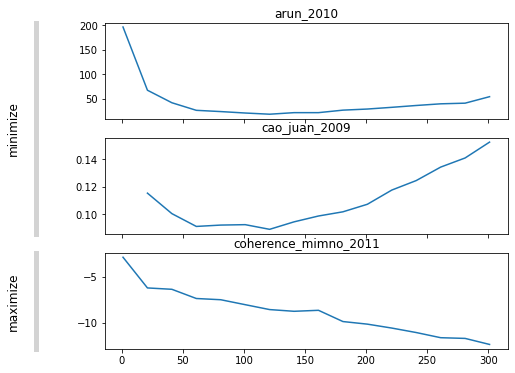

In [0]:
plot_eval_results(results_by_n_topics)

# Eval (lower beta)

In [0]:
const_params = {'n_iter': 1000 , 'eta': 0.05, 'random_state':20191122}
ks = list(range(1,302,20))
print(ks)
varying_params = [dict(n_topics = k, alpha = 1/k) for k in ks]
print(varying_params)

[1, 21, 41, 61, 81, 101, 121, 141, 161, 181, 201, 221, 241, 261, 281, 301]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 41, 'alpha': 0.024390243902439025}, {'n_topics': 61, 'alpha': 0.01639344262295082}, {'n_topics': 81, 'alpha': 0.012345679012345678}, {'n_topics': 101, 'alpha': 0.009900990099009901}, {'n_topics': 121, 'alpha': 0.008264462809917356}, {'n_topics': 141, 'alpha': 0.0070921985815602835}, {'n_topics': 161, 'alpha': 0.006211180124223602}, {'n_topics': 181, 'alpha': 0.0055248618784530384}, {'n_topics': 201, 'alpha': 0.004975124378109453}, {'n_topics': 221, 'alpha': 0.004524886877828055}, {'n_topics': 241, 'alpha': 0.004149377593360996}, {'n_topics': 261, 'alpha': 0.0038314176245210726}, {'n_topics': 281, 'alpha': 0.0035587188612099642}, {'n_topics': 301, 'alpha': 0.0033222591362126247}]


In [0]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm,
    varying_params,
    const_params)

In [0]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 195.83378655062901, 'coherence_mimno_2011': -2.872070971523358}), (21, {'cao_juan_2009': 0.10120229493783832, 'arun_2010': 65.52108719666386, 'coherence_mimno_2011': -6.150380165424589}), (41, {'cao_juan_2009': 0.08524068259727523, 'arun_2010': 36.54945168406013, 'coherence_mimno_2011': -6.708460826586492}), (61, {'cao_juan_2009': 0.08073547859851322, 'arun_2010': 23.720558440870008, 'coherence_mimno_2011': -7.204316574583625}), (81, {'cao_juan_2009': 0.07299788362635451, 'arun_2010': 18.84242088110578, 'coherence_mimno_2011': -7.472129405070475}), (101, {'cao_juan_2009': 0.07292425868221611, 'arun_2010': 18.01721123171569, 'coherence_mimno_2011': -8.062894617452846}), (121, {'cao_juan_2009': 0.06863939322391713, 'arun_2010': 17.179931656865264, 'coherence_mimno_2011': -8.451583005328109}), (141, {'cao_juan_2009': 0.06924991684076702, 'arun_2010': 18.461764706095984, 'coherence_mimno_2011': -8.904119098856217}), (161, {'cao_juan_2009': 0.0707445

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f17e85864e0>,
       dtype=object))

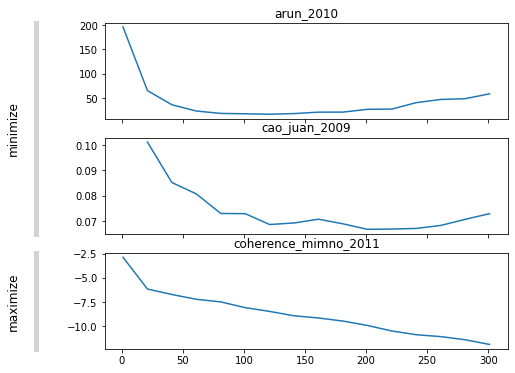

In [0]:
plot_eval_results(results_by_n_topics)

# Eval (lower alpha)

In [0]:
const_params = {'n_iter': 1000 , 'eta': 0.1, 'random_state':20191122}
ks = list(range(1,302,20))
print(ks)
varying_params = [dict(n_topics = k, alpha = 1/(10*k)) for k in ks]
print(varying_params)

[1, 21, 41, 61, 81, 101, 121, 141, 161, 181, 201, 221, 241, 261, 281, 301]
[{'n_topics': 1, 'alpha': 0.1}, {'n_topics': 21, 'alpha': 0.004761904761904762}, {'n_topics': 41, 'alpha': 0.0024390243902439024}, {'n_topics': 61, 'alpha': 0.001639344262295082}, {'n_topics': 81, 'alpha': 0.0012345679012345679}, {'n_topics': 101, 'alpha': 0.0009900990099009901}, {'n_topics': 121, 'alpha': 0.0008264462809917355}, {'n_topics': 141, 'alpha': 0.0007092198581560284}, {'n_topics': 161, 'alpha': 0.0006211180124223603}, {'n_topics': 181, 'alpha': 0.0005524861878453039}, {'n_topics': 201, 'alpha': 0.0004975124378109452}, {'n_topics': 221, 'alpha': 0.00045248868778280545}, {'n_topics': 241, 'alpha': 0.0004149377593360996}, {'n_topics': 261, 'alpha': 0.0003831417624521073}, {'n_topics': 281, 'alpha': 0.00035587188612099647}, {'n_topics': 301, 'alpha': 0.0003322259136212625}]


In [0]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm,
    varying_params,
    const_params)

In [0]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 195.85571915038244, 'coherence_mimno_2011': -2.872070971523358}), (21, {'cao_juan_2009': 0.1723091000015026, 'arun_2010': 74.9652577294188, 'coherence_mimno_2011': -6.143109710654438}), (41, {'cao_juan_2009': 0.1504335043271538, 'arun_2010': 47.08798510633182, 'coherence_mimno_2011': -6.097165089038279}), (61, {'cao_juan_2009': 0.14718307973374414, 'arun_2010': 37.91970639170381, 'coherence_mimno_2011': -6.555004674168973}), (81, {'cao_juan_2009': 0.13858647256314102, 'arun_2010': 32.080978526227476, 'coherence_mimno_2011': -7.134059438619366}), (101, {'cao_juan_2009': 0.1314509802694541, 'arun_2010': 26.629846778068888, 'coherence_mimno_2011': -7.130216250034337}), (121, {'cao_juan_2009': 0.12755985577071868, 'arun_2010': 23.84594824967736, 'coherence_mimno_2011': -7.069572543784393}), (141, {'cao_juan_2009': 0.13069356958928063, 'arun_2010': 25.26071251636654, 'coherence_mimno_2011': -7.820150194743159}), (161, {'cao_juan_2009': 0.131967961777

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f17e7e83898>,
       dtype=object))

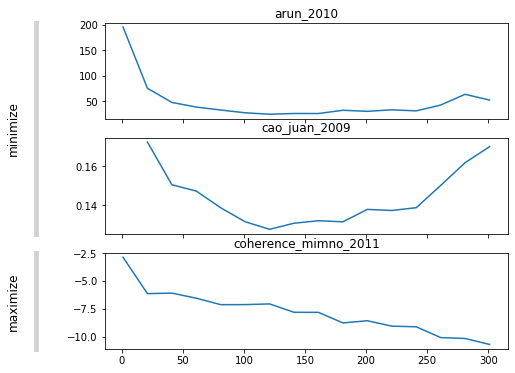

In [0]:
plot_eval_results(results_by_n_topics)